1. Import libraries for preprocessing data
2. Preprocess data using signal processing techniques
3. Visualize and compare the preprocessed data with original
4. Export the preprocessed data for deep learning


In [1]:
import pywt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('S&P_Stock_Data.csv')
df = df.set_index('Date')

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


We will try to remove the noise from the data using wavelet transformation.

First, we have to implement a low-pass filter for the 'Open' column of the dataset.

In [18]:
def lowpassfilter(signal, thresh, wavelet):
    thresh = thresh*np.nanmax(signal)
    coeff = pywt.wavedec(signal, wavelet, mode = "per")
    coeff[3:] = (pywt.threshold(i, value=thresh, mode="soft") for i in coeff[3:])
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode = "per")
    return reconstructed_signal

In [20]:
df['Filtered_Open'] = lowpassfilter(df['Open'], thresh=0.01, wavelet="coif3")

In [21]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Filtered_Open
Date,,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,1509.891113
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,1460.423078
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,1438.658516
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,1386.279016
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,1399.262688


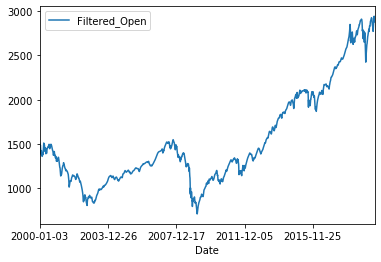

In [23]:
df.plot(kind = 'line', y = 'Filtered_Open')
plt.show()